In [2]:
import pandas as pd

# 数据读取

## 车辆于各省的销售数据

In [3]:
train_sales_data = pd.read_csv('train/train_sales_data.csv')
print(train_sales_data.shape)
train_sales_data.head()

(31680, 7)


,province,adcode,model,bodyType,regYear,regMonth,salesVolume
0,上海,310000,3c974920a76ac9c1,SUV,2016,1,292
1,云南,530000,3c974920a76ac9c1,SUV,2016,1,466
2,内蒙古,150000,3c974920a76ac9c1,SUV,2016,1,257
3,北京,110000,3c974920a76ac9c1,SUV,2016,1,408
4,四川,510000,3c974920a76ac9c1,SUV,2016,1,610


## 车辆于各省的搜索数据

In [4]:
train_search_data = pd.read_csv('train/train_search_data.csv')
print(train_search_data.shape)
train_search_data.head()

(31680, 6)


,province,adcode,model,regYear,regMonth,popularity
0,河南,410000,17bc272c93f19d56,2016,1,19036
1,河南,410000,17bc272c93f19d56,2016,2,17856
2,河南,410000,17bc272c93f19d56,2016,3,12517
3,河南,410000,17bc272c93f19d56,2016,4,9700
4,河南,410000,17bc272c93f19d56,2016,5,12780


## 评论、评价数据数据

In [5]:
train_user_reply_data = pd.read_csv('train/train_user_reply_data.csv')
print(train_user_reply_data.shape)
train_user_reply_data.head(24)

(1440, 5)


,model,regYear,regMonth,carCommentVolum,newsReplyVolum
0,02aab221aabc03b9,2016,1,132,399
1,02aab221aabc03b9,2016,2,160,3043
2,02aab221aabc03b9,2016,3,357,798
3,02aab221aabc03b9,2016,4,243,3821
4,02aab221aabc03b9,2016,5,283,933
5,02aab221aabc03b9,2016,6,252,143
6,02aab221aabc03b9,2016,7,557,623
7,02aab221aabc03b9,2016,8,652,1809
8,02aab221aabc03b9,2016,9,506,1033
9,02aab221aabc03b9,2016,10,649,4699


# 公共方法

In [6]:
def genDate(train_data):
    """
    将年月数据拼接起来，组成datetime类型
    """
    # 拼接时间数据
    train_data['Date'] = train_data['regYear'].apply(str) + '-' + train_data['regMonth'].apply(str)

    # 删除旧的年月数据
    del( train_data['regYear'] )
    del( train_data['regMonth'] )


    train_data['Date'] = pd.to_datetime(train_data['Date'])

    train_data = train_data.set_index('Date')
    return train_data

In [7]:
def get_model_province_data(train_data):
    """
    按照类型、省的层次构造数据。
    """
    car_models = []

    for model_num, model in train_data:
        provinces = model.groupby('province')

        model_province_data = []
        for province_name, province_data in provinces:
            model_province_data.append({'province_name' : province_name, 'province_data': province_data})

        car_models.append({'model_num' :  model_num,  'model_province_data' : model_province_data })
    
    return car_models

# 数据处理

## 销售数据与搜索数据处理

In [8]:
# 拼接销售数据与检索数据
sales_search_data = pd.merge(train_sales_data, train_search_data)
print(sales_search_data.shape)
sales_search_data.head()

(31680, 8)


,province,adcode,model,bodyType,regYear,regMonth,salesVolume,popularity
0,上海,310000,3c974920a76ac9c1,SUV,2016,1,292,1479
1,云南,530000,3c974920a76ac9c1,SUV,2016,1,466,1594
2,内蒙古,150000,3c974920a76ac9c1,SUV,2016,1,257,1479
3,北京,110000,3c974920a76ac9c1,SUV,2016,1,408,2370
4,四川,510000,3c974920a76ac9c1,SUV,2016,1,610,3562


In [9]:
sales_search_data.shape

(31680, 8)

In [10]:
train_user_reply_data.head()

,model,regYear,regMonth,carCommentVolum,newsReplyVolum
0,02aab221aabc03b9,2016,1,132,399
1,02aab221aabc03b9,2016,2,160,3043
2,02aab221aabc03b9,2016,3,357,798
3,02aab221aabc03b9,2016,4,243,3821
4,02aab221aabc03b9,2016,5,283,933


## 加入评论数据

In [11]:
total_data = pd.merge(sales_search_data, train_user_reply_data)

In [12]:
print(total_data.shape)
total_data.head()

(31680, 10)


,province,adcode,model,bodyType,regYear,regMonth,salesVolume,popularity,carCommentVolum,newsReplyVolum
0,上海,310000,3c974920a76ac9c1,SUV,2016,1,292,1479,11,106
1,云南,530000,3c974920a76ac9c1,SUV,2016,1,466,1594,11,106
2,内蒙古,150000,3c974920a76ac9c1,SUV,2016,1,257,1479,11,106
3,北京,110000,3c974920a76ac9c1,SUV,2016,1,408,2370,11,106
4,四川,510000,3c974920a76ac9c1,SUV,2016,1,610,3562,11,106


In [13]:
#  构建日期数据

# 1.将日期数据设置为index
# total_data = genDate(total_data)

# 2.不设置为index但是构造新的一个ds列
total_data['ds'] = total_data['regYear'].apply(str) + '-' + total_data['regMonth'].apply(str)
del( total_data['regYear'] )
del( total_data['regMonth'] )

total_data.rename(columns = {'salesVolume' : 'y'}, inplace = True)

total_data.head()

,province,adcode,model,bodyType,y,popularity,carCommentVolum,newsReplyVolum,ds
0,上海,310000,3c974920a76ac9c1,SUV,292,1479,11,106,2016-1
1,云南,530000,3c974920a76ac9c1,SUV,466,1594,11,106,2016-1
2,内蒙古,150000,3c974920a76ac9c1,SUV,257,1479,11,106,2016-1
3,北京,110000,3c974920a76ac9c1,SUV,408,2370,11,106,2016-1
4,四川,510000,3c974920a76ac9c1,SUV,610,3562,11,106,2016-1


In [14]:
# 按照种类、省市划分
total_data = total_data.groupby('model')
len(total_data)

60

In [15]:
total_data = get_model_province_data(total_data)

## 测试数据


In [17]:
evaluation_data = pd.read_csv('evaluation_public.csv')
print(evaluation_data.shape)
evaluation_data.head()

(5280, 7)


,id,province,adcode,model,regYear,regMonth,forecastVolum
0,1,上海,310000,3c974920a76ac9c1,2018,1,NaN
1,2,云南,530000,3c974920a76ac9c1,2018,1,NaN
2,3,内蒙古,150000,3c974920a76ac9c1,2018,1,NaN
3,4,北京,110000,3c974920a76ac9c1,2018,1,NaN
4,5,四川,510000,3c974920a76ac9c1,2018,1,NaN


In [20]:
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 7 columns):
id               5280 non-null int64
province         5280 non-null object
adcode           5280 non-null int64
model            5280 non-null object
regYear          5280 non-null int64
regMonth         5280 non-null int64
forecastVolum    0 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 288.8+ KB


In [47]:
import copy
evaluation_data_copy = copy.copy(evaluation_data)

In [48]:
id(evaluation_data)

139663066136984

In [49]:
id(evaluation_data_copy)

139662985615792

# 输出测试

In [53]:
type(total_data[0])

dict

In [ ]:
from fbprophet import Prophet

for model in total_data:
    model_num = model['model_num']
    model_province_data = model['model_province_data']
    print("型号：" + model_num )
    
    for province in model_province_data:
        province_name  = province['province_name']
        one_province_data =  province['province_data']
        
        # 预测
        model = Prophet( growth='linear',
                        seasonality_prior_scale=100,
                        holidays_prior_scale=100,
                        uncertainty_samples=30)
        model.fit(one_province_data)
        
        future = model.make_future_dataframe(periods=4, freq='M')
        forecast = model.predict(future)
        predit_result = forecast[-4:]['yhat'].values
        
        # 填充数据
        
        for i in range(4):
            evaluation_data.loc[(evaluation_data.province == province_name) 
                                 & (evaluation_data.model == model_num ) 
                                 & (evaluation_data.regMonth ==  i + 1),  'forecastVolum'] = predit_result[i]
        
       
        print("\t省份：" + province_name)
        
    print("="*60)
    
    

In [93]:
evaluation_data .head()

,id,province,adcode,model,regYear,regMonth,forecastVolum
0,1,上海,310000,3c974920a76ac9c1,2018,1,292.014818
1,2,云南,530000,3c974920a76ac9c1,2018,1,316.630647
2,3,内蒙古,150000,3c974920a76ac9c1,2018,1,167.068696
3,4,北京,110000,3c974920a76ac9c1,2018,1,326.016281
4,5,四川,510000,3c974920a76ac9c1,2018,1,353.496258


In [94]:
result = evaluation_data.drop(['province', 'adcode', 'model', 'regYear', 'regMonth'],  axis=1)

In [95]:
result.head()

,id,forecastVolum
0,1,292.014818
1,2,316.630647
2,3,167.068696
3,4,326.016281
4,5,353.496258


In [102]:
below_0 = result[(result.forecastVolum <= 0)].index.tolist()

import random
for e in below_0:
    result.loc[(result.index == e), 'forecastVolum'] = random.randint(2, len(below_0))

In [103]:
result['forecastVolum'] = result['forecastVolum'].astype(int)

In [104]:
below_0 = result[(result.forecastVolum <= 0)].index.tolist()
below_0

[]

In [105]:
result.to_csv("a.csv",index=False,sep=',')

In [99]:
round(3.75)

4

In [22]:
a['model_num']

'02aab221aabc03b9'

In [23]:
b = a['model_province_data']
len(b)

22

In [24]:
b[0]['province_name']

'上海'

In [25]:
one_province_data = b[1]['province_data']
one_province_data

,province,adcode,model,bodyType,y,popularity,carCommentVolum,newsReplyVolum,ds
507,云南,530000,02aab221aabc03b9,Sedan,238,204,132,399,2016-1
1827,云南,530000,02aab221aabc03b9,Sedan,87,184,160,3043,2016-2
3147,云南,530000,02aab221aabc03b9,Sedan,174,195,357,798,2016-3
4467,云南,530000,02aab221aabc03b9,Sedan,151,192,243,3821,2016-4
5787,云南,530000,02aab221aabc03b9,Sedan,202,189,283,933,2016-5
7107,云南,530000,02aab221aabc03b9,Sedan,185,208,252,143,2016-6
8427,云南,530000,02aab221aabc03b9,Sedan,247,240,557,623,2016-7
9747,云南,530000,02aab221aabc03b9,Sedan,209,236,652,1809,2016-8
11067,云南,530000,02aab221aabc03b9,Sedan,201,279,506,1033,2016-9
12387,云南,530000,02aab221aabc03b9,Sedan,174,252,649,4699,2016-10


# 模型训练

## 基于使用fbprophet

In [26]:
from fbprophet import Prophet
model = Prophet()
model.fit(one_province_data)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 18.


In [27]:
future = model.make_future_dataframe(periods=4, freq='M')
future.tail()

,ds
23,2017-12-01
24,2017-12-31
25,2018-01-31
26,2018-02-28
27,2018-03-31


In [28]:
# 预测数据集
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
23,2017-12-01,223.061447,174.018252,274.064143
24,2017-12-31,225.366747,178.857838,274.134348
25,2018-01-31,227.748891,176.683659,276.078297
26,2018-02-28,229.900505,180.592975,278.762427
27,2018-03-31,232.282648,182.584703,278.374301


In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
23,2017-12-01,223.061447,174.018252,274.064143
24,2017-12-31,225.366747,178.857838,274.134348
25,2018-01-31,227.748891,176.683659,276.078297
26,2018-02-28,229.900505,180.592975,278.762427
27,2018-03-31,232.282648,182.584703,278.374301


In [40]:
four = forecast[-4:]['yhat'].values
four

array([225.36674715, 227.74889091, 229.90050463, 232.28264839])

In [42]:
for i in range(4):
    print(four[i])

225.3667471541612
227.74889091212268
229.90050462899111
232.2826483869526


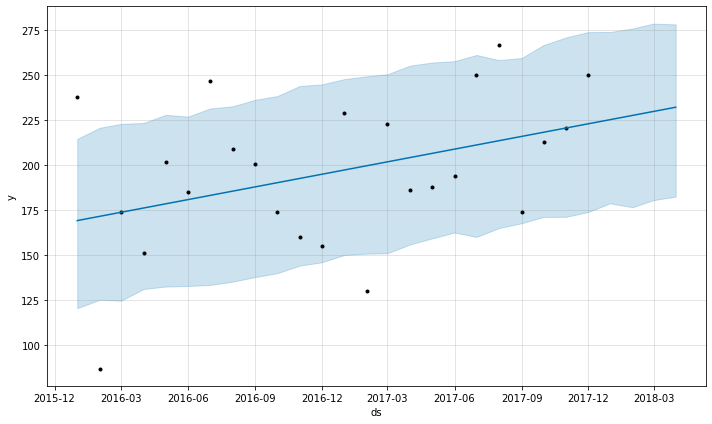

In [30]:
# 展示预测结果
model.plot(forecast);

In [94]:
model = Prophet(seasonality_prior_scale=100,
                holidays_prior_scale=100,
                uncertainty_samples=30)
model.fit(one_province_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 18.


In [95]:
# 预测数据集
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
23,2017-12-01,223.061447,194.219444,270.650003
24,2017-12-31,225.366747,174.512447,269.961567
25,2018-01-31,227.748891,184.511097,289.933071
26,2018-02-28,229.900505,186.058960,269.365786
27,2018-03-31,232.282648,170.742944,268.123355


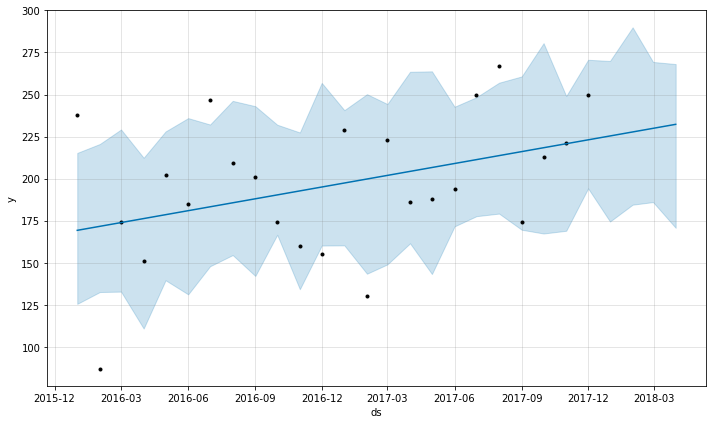

In [96]:
# 展示预测结果
model.plot(forecast);

## lightgbm

## 划分数据

In [29]:
to_drop = ['province', 'adcode', 'model', 'bodyType']
model_data =  one_province_data
model_data = model_data.drop(to_drop, axis='columns')


train = model_data[0:20]

x_train = train.drop('salesVolume', axis = 'columns')
y_train = train['salesVolume']

test = model_data[20:]
x_test = test.drop('salesVolume', axis = 'columns')
y_test = test['salesVolume']

In [30]:
x_test

,popularity,carCommentVolum,newsReplyVolum
Date,,,
2017-09-01,1028,1058,378
2017-10-01,186,784,1947
2017-11-01,341,608,1113
2017-12-01,193,403,2037


In [31]:
y_test

Date
2017-09-01    174
2017-10-01    213
2017-11-01    221
2017-12-01    250
Name: salesVolume, dtype: int64

In [38]:
import lightgbm as lgb


lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'l2', 'auc'},
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
        }

model = lgb.train(params,
                  lgb_train,
                  num_boost_round=20,
                  valid_sets=lgb_test, 
                  early_stopping_rounds=5)

y_pred = model.predict(x_test, num_iteration=model.best_iteration)

[1]	valid_0's l2: 29806.5	valid_0's auc: 1
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 29806.5	valid_0's auc: 1
[3]	valid_0's l2: 29806.5	valid_0's auc: 1
[4]	valid_0's l2: 29806.5	valid_0's auc: 1
[5]	valid_0's l2: 29806.5	valid_0's auc: 1
[6]	valid_0's l2: 29806.5	valid_0's auc: 1
Early stopping, best iteration is:
[1]	valid_0's l2: 29806.5	valid_0's auc: 1


In [39]:
y_pred

array([192.5, 192.5, 192.5, 192.5])